## Exercises: Variance Reduction by Reparametrization

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

%matplotlib inline

#### Introduction

We want to compute the gradient of an expectation:

$$
\nabla_\phi \mathbb E_{q_\phi(z)} \left[ f(z) \right]
$$

Here, we assume that $f(z)$ has no dependency w.r.t. $\phi$.

#### Score Function Estimator

#### Crude MC estimator

$$
\begin{align}
\nabla_\phi \mathbb E_{q_\phi(z)} \left[ f(z) \right] &= \mathbb E_{q_\phi(z)} \left[  f(z)  \nabla_\phi \log q_\phi(z)\right]\\
 & = \int f(z)  q_\phi(z)  \nabla_\phi \log q_\phi(z) dz \\
\end{align}
$$

The integral can be estimated by Monte-Carlo with sampling of the hidden variables $z^{(i)}$ from $q_\phi(z)$ (notation: $z^{(i)}\sim q_\phi(z)$):        

$$
 \int f(z)  q_\phi(z)  \nabla_\phi \log q_\phi(z) dz 
\approx \frac{1}{n} \sum_{i=1}^n f(z^{(i)})\nabla_\phi \log q_\phi(z^{(i)})  
$$



The problem of the crude MC estimator is that it has *high variance*.



#### Example

Let's keep the things simple. We use a Gaussian for our distribution $q_{\phi}(z^{(i)})$
with $\phi = \{ \mu, \sigma^2\}$:

$$
\mathcal N (z \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp(-\frac{(z-\mu)^2}{2 \sigma^2})
$$



As function we use $f(z)=z^2$.

In [9]:
loc=mu=10. 
scale=3.
sigma2 = scale**2
size=100

def sample_z_from_q(loc=loc, scale=scale, size=size):
    return np.random.normal(loc=loc, scale=scale, size=size)

In [10]:
def f(z):
    return z**2

Show that the derivatives w.r.t. $\mu$ and $\sigma^2$ are:

$$
\frac{\partial}{\partial \mu} \log \mathcal N (z \mid \mu, \sigma^2) = \frac{(z-\mu)}{\sigma^2}\\
$$

$$
\frac{\partial}{\partial \sigma^2} \log \mathcal N (z \mid \mu, \sigma^2) = - \frac{1}{2 \sigma^2}+ \frac{(z-\mu)^2}{2 (\sigma^2)^2}\\
$$

$$
\begin{align}
\frac{\partial}{\partial \mu} \log \mathcal N (z \mid \mu, \sigma^2) &= \frac{\partial}{\partial \mu}  \log \left(\frac{1}{\sqrt{2\pi \sigma^2}} \exp(-\frac{(z-\mu)^2}{2 \sigma^2})\right)\\
 &= \frac{\partial}{\partial \mu}  \left(\log \left(\frac{1}{\sqrt{2\pi \sigma^2}} \right)+  \left(\log \exp(-\frac{(z-\mu)^2}{2 \sigma^2})\right)\right)\\
 &= \frac{\partial}{\partial \mu}  \log \left(\frac{1}{\sqrt{2\pi \sigma^2}} \right)+  \frac{\partial}{\partial \mu}
 \left(\log \exp(-\frac{(z-\mu)^2}{2 \sigma^2})\right)\\
 &= 0 - \frac{\partial}{\partial \mu}\frac{(z-\mu)^2}{2 \sigma^2}\\
 &= \frac{(z-\mu)}{\sigma^2}\\
\end{align}
$$


$$
\begin{align}
\frac{\partial}{\partial \sigma^2} \log \mathcal N (z \mid \mu, \sigma^2) &= \frac{\partial}{\partial \sigma^2}  \log \left(\frac{1}{\sqrt{2\pi \sigma^2}} \exp(-\frac{(z-\mu)^2}{2\sigma^2})\right) \\
&= \frac{\partial}{\partial \sigma^2}  \left(\log \left(\frac{1}{\sqrt{2\pi \sigma^2}} \right)+  \left(\log \exp(-\frac{(z-\mu)^2}{2\sigma^2})\right)\right)\\
&= \frac{\partial}{\partial \sigma^2}  \log \left(\frac{1}{\sqrt{2\pi \sigma^2}} \right)+  \frac{\partial}{\partial \sigma^2}
 \left(\log \exp(-\frac{(z-\mu)^2}{2\sigma^2})\right)\\
&= - \frac{\partial}{\partial \sigma^2}  \log \left(\sqrt{2\pi \sigma^2} \right)+  \frac{\partial}{\partial \sigma^2}
 \left(\log \exp(-\frac{(z-\mu)^2}{2 \sigma^2})\right)\\
 &= - \frac{1}{2 \sigma^2}+ \frac{(z-\mu)^2}{2 (\sigma^2)^2}\\
\end{align}
$$

In [11]:
def dq_dmu(z, mu=mu, sigma2=sigma2):
    return (z - mu)/sigma2

def dq_dsigma2(z, mu=mu, sigma2=sigma2):
    return - 1/(2*sigma2) + (z-mu)**2/sigma2**2

Exercise: Implement the Crude MC estimator:




$$
\begin{align}
\frac{\partial}{\partial \mu} \mathbb E_{\mathcal N (z \mid \mu, \sigma^2) } \left[ f(z) \right] &= \mathbb E_{\mathcal N (z \mid \mu, \sigma^2) } \left[  f(z)  \frac{\partial}{\partial \mu} \log \mathcal N (z \mid \mu, \sigma^2)\right]\\
 & \approx \frac{1}{n} \sum_{i=1}^n f(z^{(i)}) \frac{\partial}{\partial \mu} \log \mathcal N (z \mid \mu, \sigma^2) = \frac{1}{n} \sum_{i=1}^n f(z^{(i)}) \frac{(z^{(i)}-\mu)}{\sigma^2}
\end{align}
$$

In [13]:
def get_crude_mc_estimates(size):
    estimates = []
    for i in range(10000):
        estimate = crude_mc_estimate(size=size, f=f, dq_dmu=dq_dmu)
        estimates.append(estimate)
    return np.array(estimates)

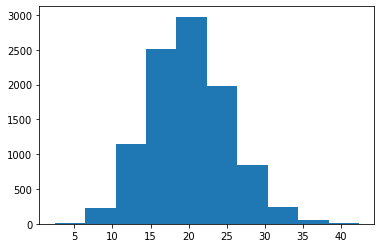

In [14]:
estimates = get_crude_mc_estimates(size=100)
plt.hist(estimates);
#plt.xlim(15, 25)

(15.0, 25.0)

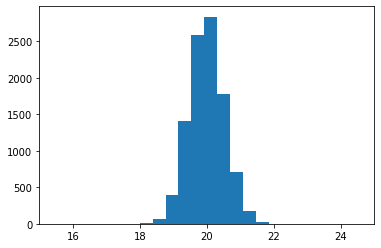

In [28]:
estimates = get_crude_mc_estimates(size=10000)
plt.hist(estimates);
plt.xlim(15, 25)

#### Reparametrization for variance reduction

$z = g_\phi(\epsilon)$

$$
\nabla_\phi \mathbb E_{q_\phi(z)} \left[ f(z) \right] =
\mathbb E_{p(\epsilon)} [\nabla_\phi f (g_\phi(\epsilon))]
$$

$p(\epsilon)$ is a (fixed) distribution with no dependence on $\phi$. 

Here:
 - $p(\epsilon) = \mathcal N(0, 1)$
 - $g_{\mu, \sigma^2}(\epsilon) = \mu + \epsilon  \sigma$

#### Exercise

- Implement the reparametrized MC estimator

$$\frac{\partial}{\partial \mu} \mathbb E_{\mathcal N (z \mid \mu, \sigma^2) } \left[ f(z) \right]
 = \mathbb E_{p(\epsilon)} \left[\frac{\partial}{\partial \mu} f (g_{\mu, \sigma^2}(\epsilon))\right]$$
 
  - Find a mathematical expression for $\frac{\partial f}{\partial \mu}$ and use it in the estimator.
  - Sample $\epsilon \sim \mathcal N(0, 1)$ 

In [21]:
def sample_epsilon_from_p(size=size): # no dependence on mu and sigma2
    return np.random.normal(loc=0, scale=1, size=size)

$$
\nabla_\phi f (g_\phi(\epsilon))
$$

$$
g = \mu + \epsilon  \sigma
$$


$z = g_{\mu, \sigma^2}(\epsilon)$


$$
f(z) = f(g) = g^2
$$

$$
\frac{\partial f}{\partial \mu} = \frac{\partial f}{\partial g}\frac{\partial g}{\partial \mu} = 2 g
$$



In [22]:
def get_reparametrized_mc_estimates(size):
    estimates = []
    for i in range(10000):
        estimate= reparametrized_mc_estimate(size)
        estimates.append(estimate)
    return np.array(estimates)

In [23]:
def g(epsilon, mu=mu, sigma2=sigma2):
    return mu + epsilon * np.sqrt(sigma2)

In [24]:
def reparametrized_mc_estimate(size):
    epsilons = sample_epsilon_from_p(size)
    return (2 * g(epsilons)).mean()

(15.0, 25.0)

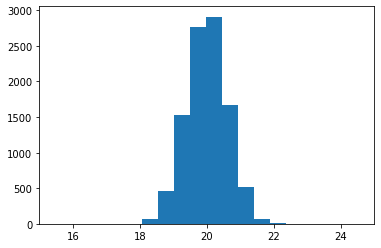

In [26]:
# here we need just 100 samples to get a similar result as for 10000 "crude" mc samples
estimates = get_reparametrized_mc_estimates(100)
plt.hist(estimates);
plt.xlim(15, 25)

(15.0, 25.0)

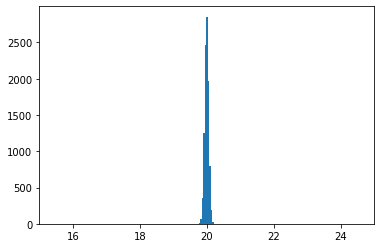

In [27]:
#### for 10000 samples
estimates = get_reparametrized_mc_estimates(10000)
plt.hist(estimates);
plt.xlim(15, 25)

#### Comparision between crude MC and reparametrized MC


In [31]:
crude_mc_var = []
reparam_mc_var = []
ns = np.array([10,30,90,300,600,900, 1500, 3000])
for i in ns:
    crude_mc_estimates = get_crude_mc_estimates(size=i)
    reparam_mc_estimates = get_reparametrized_mc_estimates(size=i)
    crude_mc_var.append(crude_mc_estimates.var(ddof=1))
    reparam_mc_var.append(reparam_mc_estimates.var(ddof=1))
crude_mc_var = np.array(crude_mc_var)
reparam_mc_var = np.array(reparam_mc_var)

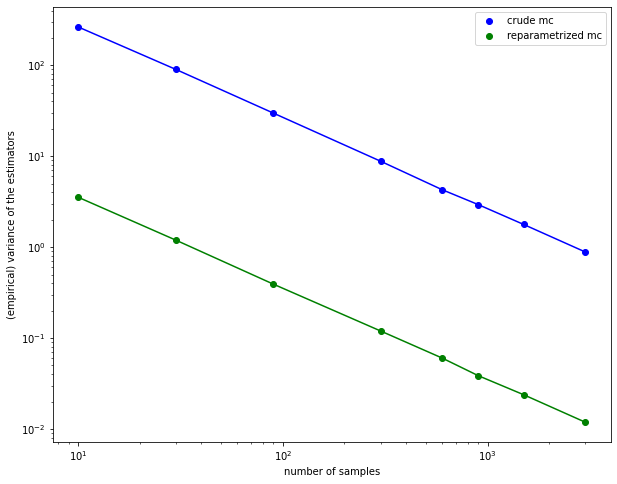

In [33]:
plt.figure(figsize=(10, 8))
plt.loglog(ns, crude_mc_var, "bo", label="crude mc")
plt.loglog(ns, crude_mc_var, "b-")
plt.loglog(ns, reparam_mc_var, "go", label="reparametrized mc")
plt.loglog(ns, reparam_mc_var, "g-")
plt.xlabel("number of samples")
plt.ylabel("(empirical) variance of the estimators")
plt.legend();

As you can see from the plot there is a strait line in a log-log plot:

$$
\log y = a + b \log x
$$

therefore (with $c = \exp(a)$):
$$
y = c x^b
$$

We know:

$$
var(estimate) = \frac{c}{n}
$$

so be must be $-1$. Let's check this:


In [34]:
b_crude = (np.log(crude_mc_var[-1]) - np.log(crude_mc_var[0]))/(np.log(ns[-1])-np.log(ns[0]))
b_crude

-0.99941471435789

In [35]:
b_reparm = (np.log(reparam_mc_var[-1]) - np.log(reparam_mc_var[0]))/(np.log(ns[-1])-np.log(ns[0]))
b_reparm

-0.9990830204661545


$$
a = \log y - b \log x  
$$



In [36]:
# with b \approx 1
as_reparam = np.log(reparam_mc_var) + np.log(ns) 
cs_reparam = np.exp(as_reparam)
cs_reparam.mean()

35.60938040036834

In [37]:
# with b \approx 1
as_crude = np.log(crude_mc_var) + np.log(ns) 
cs_crude= np.exp(as_crude)
cs_crude.mean()

2651.5959105795528

$$
var(estimate\_reparam) = \frac{35.8}{n}
$$

$$
var(estimate\_crude) = \frac{2648}{n}
$$



$$
\eta_{VR} =\frac{\text{var}\left(\hat H_n\right)-\text{var}\left(\bar H_n\right)}{\text{var}\left(\hat H_n\right)}
$$

In [38]:
eta = (2648-35.8)/2648
eta

0.9864803625377643

In [39]:
# Here we need approx. 1.35% of the samples to get the same 
# variance with our variance reduction technique 
35.8/2648

0.013519637462235648

#### Literature

- Diederik P. Kingma, Max Welling: Auto-Encoding Variational Bayes,     
- Diederik P. Kingma, Max Welling: Efficient Gradient-based Inference through Transformation between Bayes Nets and Neural Nets,